# Homework #2
## Introduction to unsupervised learning 


This colaboratory contains Homework #2 which is due **October 2 midnight (23:59 EET time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.

**NB! Links to your colaboratory will not be accepted as a solution!**
## Submission's rules:
*(just in case reminding you)*
1.   Please, submit only .ipynb that you extract from the Colaboratory.
2. Run your homework exercises before submitting (output should be present, preferably restart the kernel and press run all the cells).
3. Do not change the description of tasks in red (even if there is a typo|mistake|etc).
4. Please, make sure to avoid unnecessary long printouts.
5. Each task should be solved right under the question of the task and not elsewhere.
6. Solutions to both regular and bonus exercises should be submitted in one IPYNB file.

Please, steer clear of copying someone else's work. If you discuss assignments with anyone in the course, please, mention their names here:
1. Pooh

##List of Homework's exercises:

1.   [Ex1](#scrollTo=1YXt-Gxw9UY7) - 5 points
2.   [Ex2](#scrollTo=x93C489B3rq9) - 3 points
3.   [Ex3](#scrollTo=6ixMMWLE1XGr) - 2 points
4.   [Bonus 1](#scrollTo=93rYhdhm3by8) - 0.5 points
5.   [Bonus 2](#scrollTo=IhIMUQjs3bzV) -  0.5 points
6.   [Bonus 3](#scrollTo=3vwwyCwumcxJ&line=3&uniqifier=1) - 4 points



## HW Setup: 

In [1]:
# The three giants on top which everything else is built
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# We don't like warnings
import warnings
warnings.filterwarnings('ignore')

# For plotting like a pro
!pip install -q plotnine
from plotnine import *

from tensorflow.keras.datasets import mnist

## Homework exercise 1 (5 points): PCA on MNIST
<font color='red'> In this exercise we shall look into the effects of using PCA on the execution time of ML algorithms as well as their performance. To this end we will load **the entire** MNIST dataset.
</font>

In [2]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
train_images = train_images / 255 # normalising train images
test_images = test_images / 255 # normalising test images

# reshaping each image 28x28 into a vector of 784 values
# needed for the scikit learn to work properly
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1]*train_images.shape[2])
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1]*test_images.shape[2])

<font color='red'> Here we perform standardization of both training and test sets using mean and standard deviation computed based on training data (because in reality test set statistics is not available).
</font>

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Here we evaluate mean and standard deviation based on training.
scaler.fit(train_images)

# Apply transform to both the training set and the test set.
train_images = scaler.transform(train_images)
test_images = scaler.transform(test_images)

<font color='red'> In this exercise we will use another type of linear model called Logistic Regression. We have not discussed this model in the lecture, hence we give it a short introduction here. Logistic Regression is very similar to Linear Regression model that we had an opportunity to try last time, with an important difference - it is a **classification model**. Also, unlike Linear Regression which uses the least squares method to fit the line, Logistic Regression uses a principle called **maximum likelihood** to fit the model. In simpler terms, you can think of Logistic Regression is an extension to Linear Regression that helps to convert continuous predictions into probabilities and then to classes.

For the sake of this exercise, you do not need to know all the details of the method. [Here](https://towardsdatascience.com/logistic-regression-explained-9ee73cede081) you can find more information about Logistic Regression and maximum likelihood method.
</font>

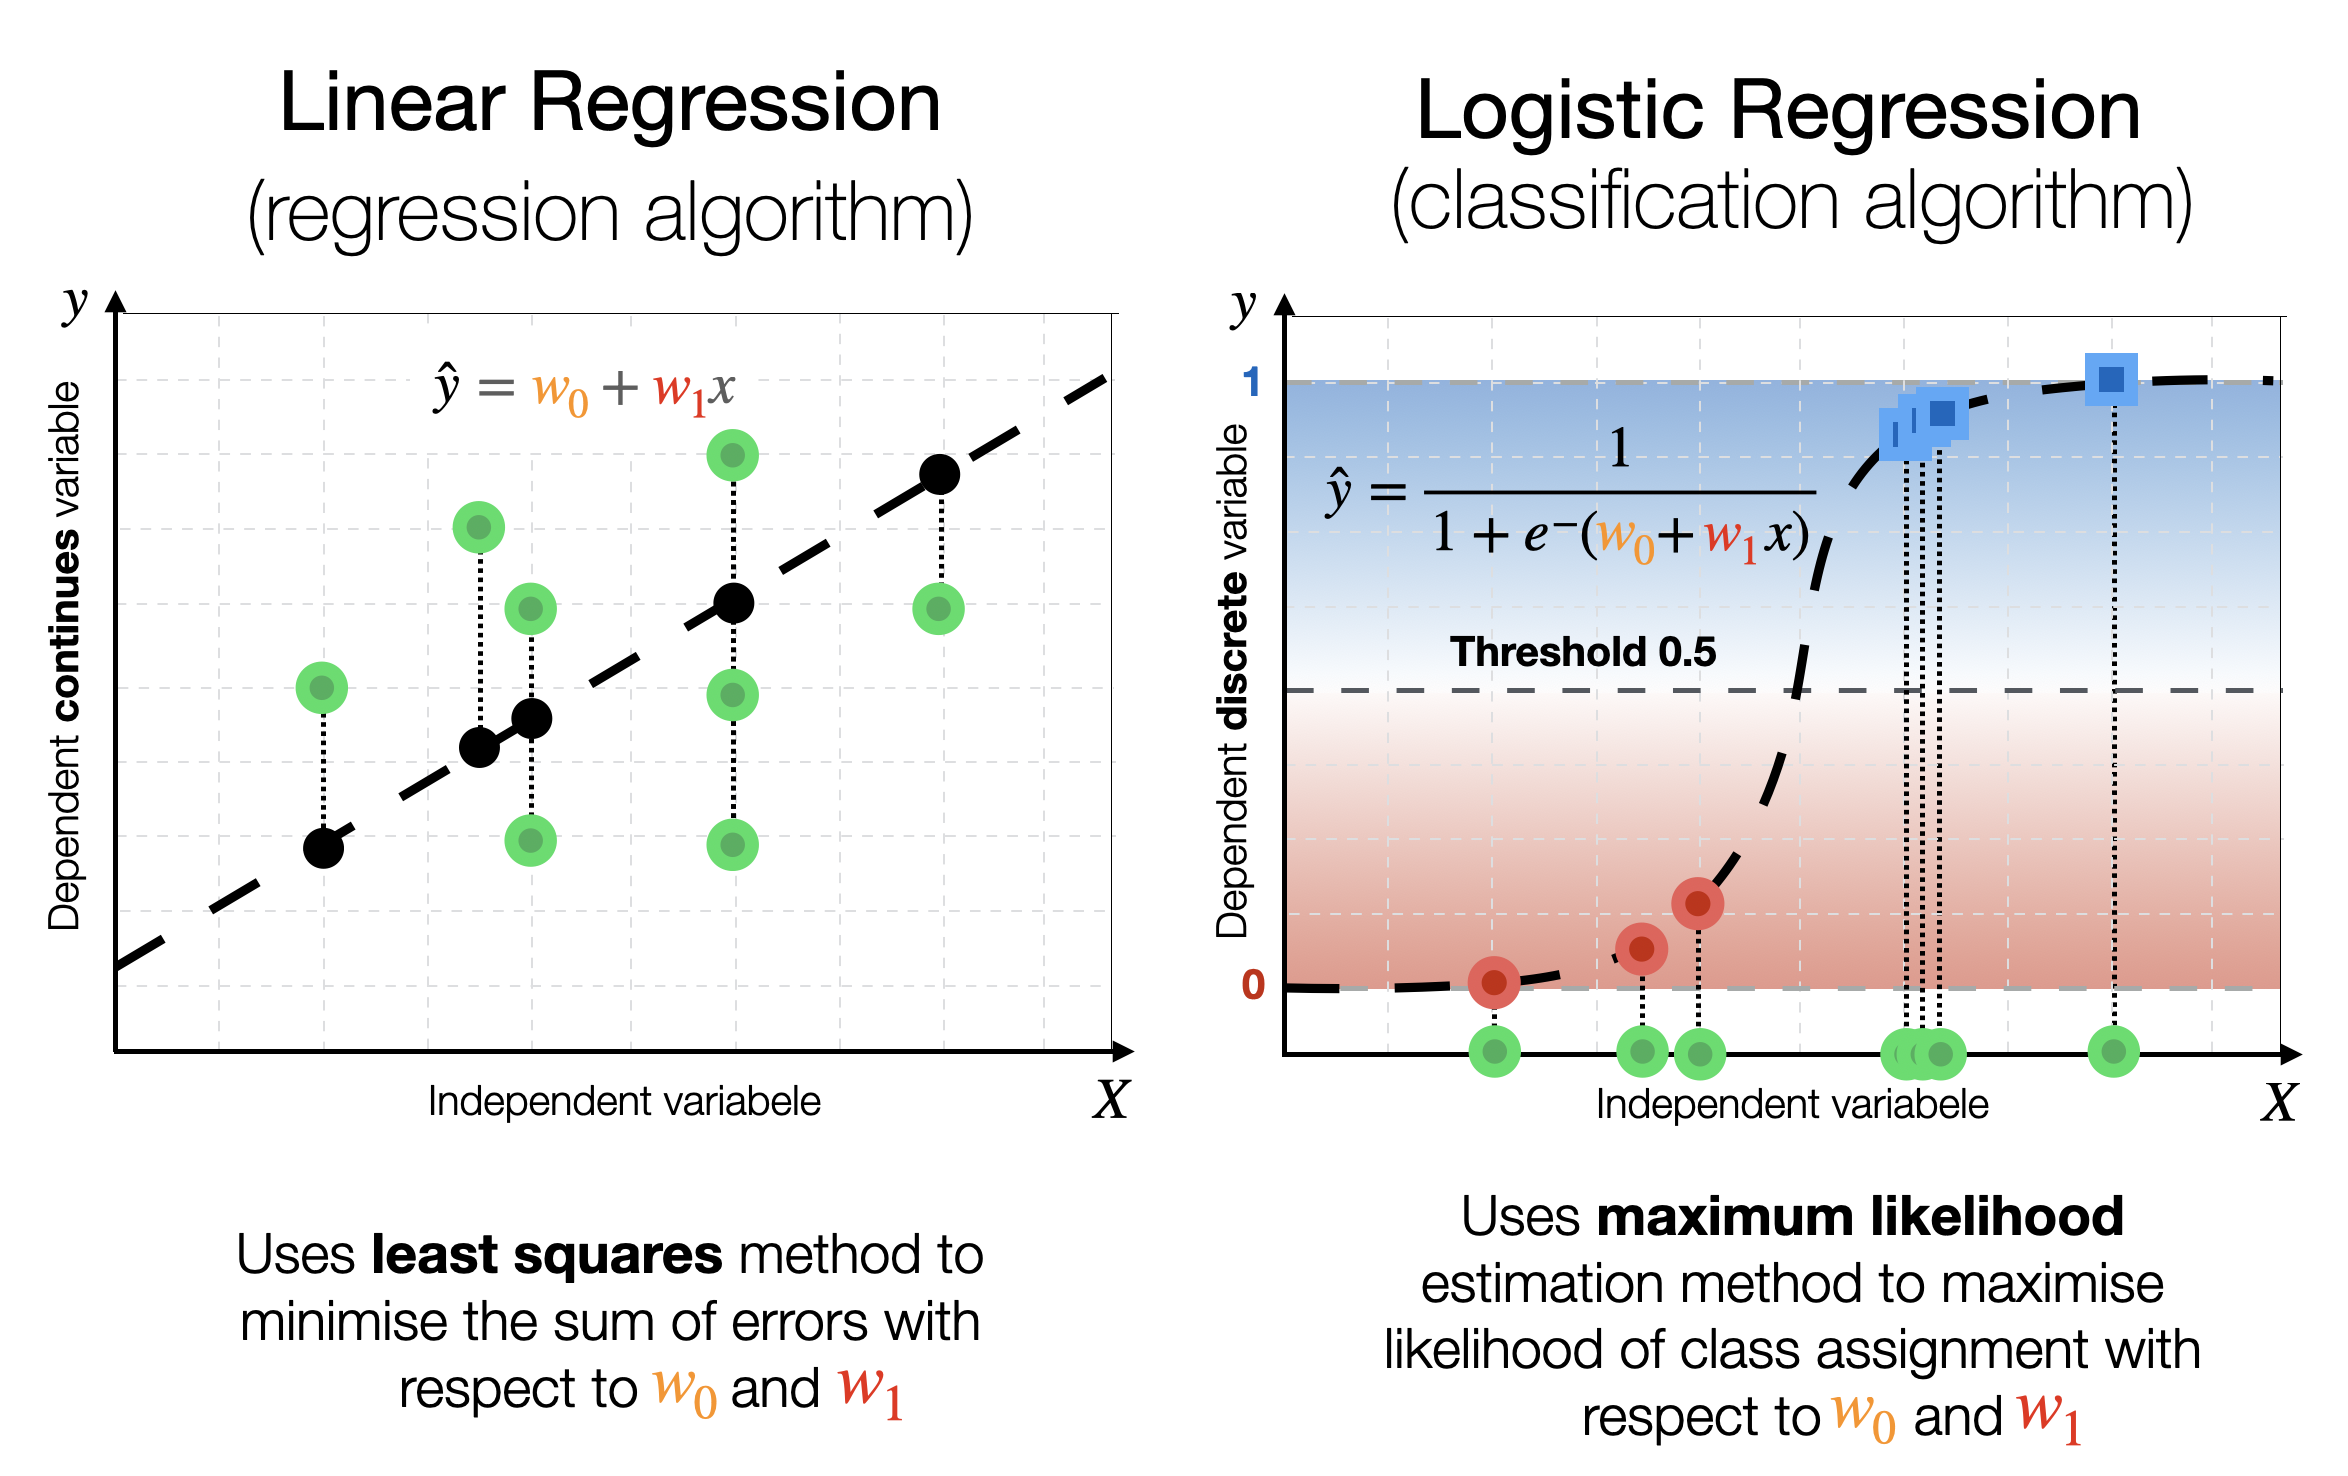

<font color='red'>**(Homework exercise 1- a)** Run vanila Logistic Regression on original data, calculate and report the score (which in this case is accuracy) and fitting time (use `time` library as in the practice session). (2 points)
</font>

In [4]:
from sklearn.linear_model import LogisticRegression
import time 

# default solver is incredibly slow hence you should use 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

##### YOUR CODE STARTS #####
from sklearn.metrics import accuracy_score
start_time = time.time()
logisticRegr.fit(train_images, train_labels)
end_time = time.time()
exec_time = f"{end_time - start_time:.2f}"
score = accuracy_score(test_labels,  logisticRegr.predict(test_images))
##### YOUR CODE ENDS ##### 

n_features = train_images.shape[1]
print(f"It took {exec_time} seconds to get {score} accuracy using {n_features} features")

It took 68.93 seconds to get 0.9246 accuracy using 784 features


<font color='red'>**(Homework exercise 1- b)** Perform a PCA on MNIST data. Retain as many PCs as needed to explain 90% of original variance. Visualise the projections on the first two principle components of the training images usign the scatter plot. (1 point)

In [5]:
from sklearn.decomposition import PCA
##### YOUR CODE STARTS #####
# Fit PCA on train images
pca_09 = PCA(0.9)
pca_09.fit(train_images)
train_images_compressed = pca_09.transform(train_images)
test_images_compressed = pca_09.transform(test_images)
##### YOUR CODE ENDS ##### 

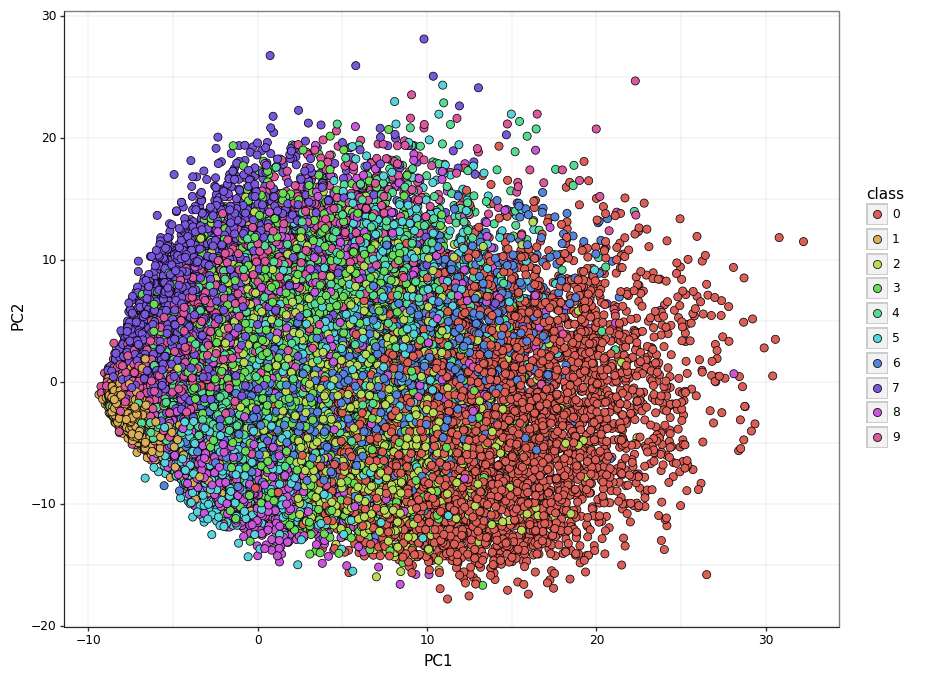

In [6]:
##### YOUR CODE STARTS #####
transposed = train_images_compressed.T
visualise_train = pd.DataFrame({'PC1':np.array(transposed)[0], 'PC2':np.array(transposed)[1], 'class': train_labels})
##### YOUR CODE ENDS ##### 

visualise_train['class'] = visualise_train['class'].astype("category")
fig = (   
    ggplot(data = visualise_train,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(aes(fill = 'class'), size = 3, shape = 'o', stroke = 0.3) +
    
    # All the style related codes goes here:
    labs(title ='', x = 'PC1', y = 'PC2',) +
    theme_bw() +  
    theme(figure_size = (10, 8),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
).draw()


<font color='red'>**(Homework exercise 1- c)** Fit the  Logistic Regression on `train_images_compressed`, calculate and report the fitting time, the accuracy on test images (aka `score`) and the number of principle components that were kept (in `n_features`). (0.5 points)
</font>

In [7]:
logisticRegr = LogisticRegression(solver = 'lbfgs')
##### YOUR CODE STARTS #####
start_time = time.time()
logisticRegr.fit(train_images_compressed, train_labels)
end_time = time.time()
exec_time = f"{end_time - start_time:.2f}"
score = accuracy_score(test_labels,  logisticRegr.predict(test_images_compressed))
n_features = logisticRegr.n_features_in_
##### YOUR CODE ENDS ##### 
print(f"It took {exec_time} seconds to get {score} accuracy using {n_features} features")

It took 16.25 seconds to get 0.9281 accuracy using 236 features


<font color='red'>**(Homework exercise 1- d)** Combine **1-b** (except for visualisation of PCA) and **1-c** in the for loop, every time retaining different amount of variance (from 0.85 to 0.5 with a step of 0.05). In every iteration collect information on how much the execution time and accuracy changes with respect to the number of principle components kept by the PCA. (1 point).
</font>

In [8]:
for variance in [0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5]:
  print(f"Retaining {variance*100}% of variance")
  ##### YOUR CODE STARTS #####
  pca_09 = PCA(variance)
  pca_09.fit(train_images)
  train_images_compressed = pca_09.transform(train_images)
  test_images_compressed = pca_09.transform(test_images)

  logisticRegr = LogisticRegression(solver = 'lbfgs')
  start_time = time.time()
  logisticRegr.fit(train_images_compressed, train_labels)
  end_time = time.time()
  exec_time = f"{end_time - start_time:.2f}"
  score = accuracy_score(test_labels,  logisticRegr.predict(test_images_compressed))
  n_features = logisticRegr.n_features_in_
  ##### YOUR CODE ENDS ##### 
  print(f"It took {exec_time} seconds to get {score} using {n_features} features")

Retaining 85.0% of variance
It took 14.99 seconds to get 0.9264 using 185 features
Retaining 80.0% of variance
It took 13.95 seconds to get 0.9237 using 149 features
Retaining 75.0% of variance
It took 11.54 seconds to get 0.9214 using 120 features
Retaining 70.0% of variance
It took 10.48 seconds to get 0.9196 using 98 features
Retaining 65.0% of variance
It took 10.00 seconds to get 0.9174 using 80 features
Retaining 60.0% of variance
It took 9.91 seconds to get 0.9108 using 64 features
Retaining 55.00000000000001% of variance
It took 9.16 seconds to get 0.9042 using 50 features
Retaining 50.0% of variance
It took 8.58 seconds to get 0.9001 using 39 features


<font color='red'>**(Homework exercise 1- e)** Shortly answer the following questions (0.5 points):  
* What is the minimum number of principle components was needed in **1- d** to approximately match the performance on the original data? 
* How much faster was the model trained on smaller data?
* What are the main advantages and disadvantages of PCA transformation?
* When would you use the PCA transformation and when you wouldn't?
</font>

<font color="blue"> Answer (e): </font>

<font color="blue"> * To approximate the original data accracy (0.9246) I would need to use about to 180 principle components.  </font>

<font color="blue">* Original model took 55 seconds and model retaining 90% variance was already 4 times faster. Decreasing data size even further was 6.5 times faster at 50% variance.</font>

<font color="blue">* PCA allows to decreasing the size of data while preserving as much information as possible, so speed increase is a given. High-dimensional space will be more reasonably covered and smaller datasets can be visualized more easily.</font>

<font color="blue">* Principle components only capture linear relationships between original features, therefore it fails when that assumption is violated. So any hidden nonlinear pattern probably wont be found</font>



## Homework exercise 2 (3 points): Increasing the dimensionality

<font color='red'> In the lecture and also in the practice session we have mostly discussed benefits of reducing the number of dimensions. It turns out (as often in life) that the opposite i.e. adding features can also sometimes be very useful. For example, we have seen in the first homework, how constructing a better distance measure helps us predict taxi ride prices in NYC. Hence, in this exercise, we will further explore the potential of **feature engineering**.
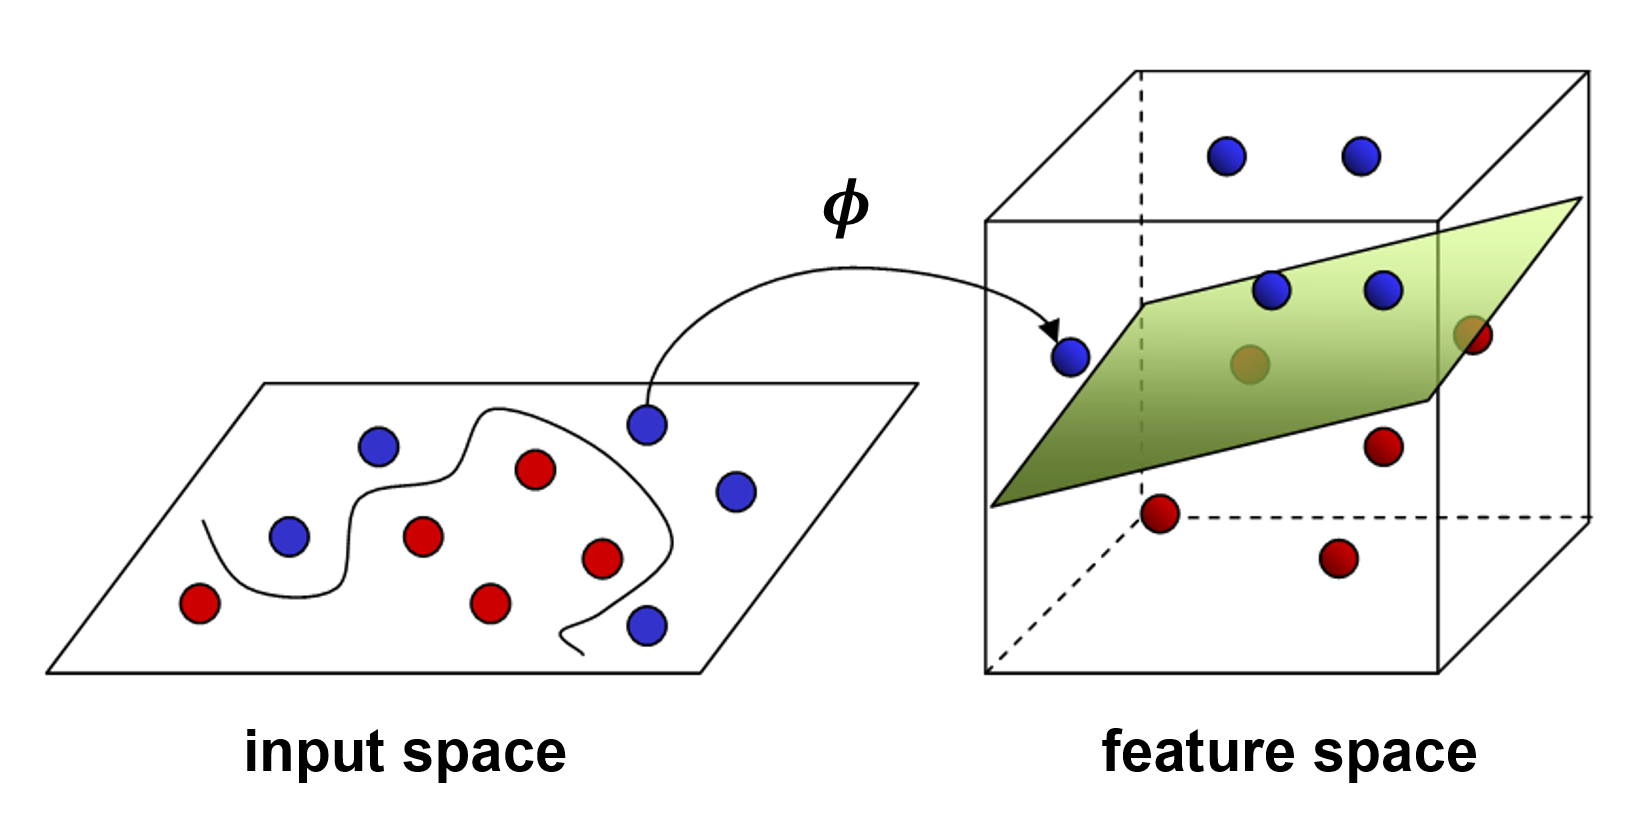
</font>



In [9]:
# Generate data that we are going to use in this exercise
# Please, do not change this cell
from sklearn.model_selection import train_test_split
from sklearn import datasets

circles = datasets.make_circles(n_samples=100, shuffle = True, noise = 0.05, random_state = 111)
circles_pd = pd.DataFrame({'x':circles[0][:,0], 'y':circles[0][:,1], 'class':circles[1]})
circles_pd['class'] = circles_pd['class'].astype('category')

circles_pd_train, circles_pd_test = train_test_split(circles_pd, test_size = 0.4, random_state = 111)

<font color='red'> Below we visualise the dataset to understand the scale of the problem we are facing.
</font>

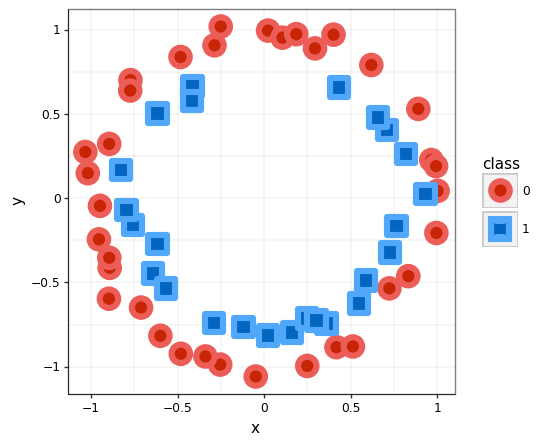

In [10]:
fig = (
    ggplot(data = circles_pd_train,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(shape = 'class',
                   fill = 'class',
                   colour = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    theme_bw() +
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
).draw()

<font color='red'> Does not look very promising indeed.
</font>

<font color='red'>**(Homework exercise 2- a)** Train both `DecisionTreeClassifier` with low `max_depth = 5` (to avoid strong overfitting) and `LogisticRegression` (use the same solver `lbfgs` for simplicity) from the previous exercise on these points. Measure and report the performance of the models on test points. (1 point)
</font>

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

##### YOUR CODE STARTS #####
DT_model = DecisionTreeClassifier(max_depth = 5)
DT_model.fit(circles_pd_train[['x', 'y']], circles_pd_train['class'])
dt_score = accuracy_score(circles_pd_test['class'], DT_model.predict(circles_pd_test[['x', 'y']]))

logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(circles_pd_train[['x', 'y']], circles_pd_train['class'])
lg_score = accuracy_score(circles_pd_test['class'], logisticRegr.predict(circles_pd_test[['x', 'y']]))
##### YOUR CODE ENDS ##### 

print(f'Decision Tree score is {dt_score} and Logistic Regression score is {lg_score}')

Decision Tree score is 0.575 and Logistic Regression score is 0.275


<font color='red'>**(Homework exercise 2- b)** In order to remedy the situation create a new variable `z` using two other variables, by projecting all 2D points onto a surface of a paraboloid (3D parabola) with a centre in (0, 0). This way, compute z coordinates for each 2D point in both training and test sets. Train the same models as in **2-a** now taking into account a newly created `z` variable. Report the final scores. (2 points)
</font>

In [12]:
##### YOUR CODE STARTS #####
circles_pd_train['z'] = np.sqrt(circles_pd_train['x']**2 + circles_pd_train['y']**2)
circles_pd_test['z'] = np.sqrt(circles_pd_test['x']**2 + circles_pd_test['y']**2)
##### YOUR CODE ENDS ##### 

<font color='red'>If you did everything correctly in the previous cells, on the figure that is generated by the next cell, you should see two separable classes, which should be also reflected in improved scores for both models.
</font>

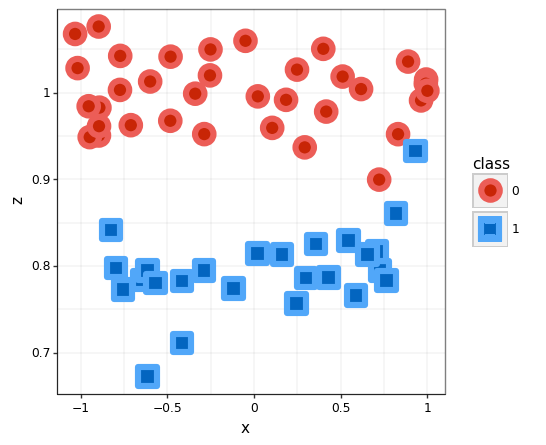

In [13]:
fig = (
    ggplot(data = circles_pd_train,
          mapping = aes(x = 'x', y = 'z')) +
    geom_point(aes(shape = 'class',
                   fill = 'class',
                   colour = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'z',
    ) +
    theme_bw() +
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
).draw()

In [14]:
##### YOUR CODE STARTS #####
DT_model = DecisionTreeClassifier(max_depth = 5)
DT_model.fit(circles_pd_train[['x', 'y', 'z']], circles_pd_train['class'])
dt_score = accuracy_score(circles_pd_test['class'], DT_model.predict(circles_pd_test[['x', 'y', 'z']]))

logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(circles_pd_train[['x', 'y', 'z']], circles_pd_train['class'])
lg_score = accuracy_score(circles_pd_test['class'], logisticRegr.predict(circles_pd_test[['x', 'y', 'z']]))
##### YOUR CODE ENDS ##### 

print(f'Improved Decision Tree score is {dt_score} and Logistic Regression score is {lg_score}')

Improved Decision Tree score is 0.925 and Logistic Regression score is 0.5


## Homework exercise 3 (2 points): Elbow method

In [15]:
cluster_data = pd.DataFrame({'x':[2,3,3,5,6,7,7], 'y':[7,6,8,5,6,4,6]})

def dist(point1, point2):
  return(np.sqrt(np.sum(np.abs(point1 - point2)**2)))

<font color='red'>**(Homework exercise 3- a)** Make a function that computes the squared sum of errors (SSE) for given clustering results. (1 point)

In [16]:
##### YOUR CODE STARTS #####
def compute_inertia(clustering, cluster_data):
  sse = np.zeros(len(clustering.cluster_centers_))
  for node in cluster_data.values:
    min = -1
    cluster = -1
    for i, cluster_center in enumerate(clustering.cluster_centers_):
      distance = dist(node, cluster_center)
      if min == -1 or min > distance:
        min = distance
        cluster = i
    sse[cluster] += min**2
  return(np.sum(sse))
##### YOUR CODE ENDS ##### (please do not delete this line)

Verify that your function works 

In [17]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=4, random_state=0).fit(cluster_data)
print(compute_inertia(clustering, cluster_data))
print(clustering.inertia_)

3.166666666666666
3.166666666666667


<font color='red'>**(Homework exercise 3- b)** For each K compute corresponding inertia (or SSE) and plot it for each K. (0.5 points)

In [18]:
K_options = [1, 2, 3, 4, 5, 6, 7]
##### YOUR CODE STARTS #####
inertia_vec = [compute_inertia(KMeans(n_clusters=k, random_state=0).fit(cluster_data), cluster_data) for k in K_options]
##### YOUR CODE ENDS ##### (please do not delete this line)
print(inertia_vec)

[35.42857142857144, 8.166666666666666, 5.333333333333333, 3.166666666666666, 1.5000000000000002, 0.5, 0.0]


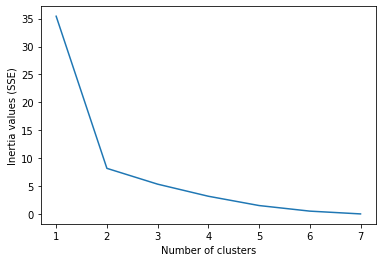

In [19]:
plt.plot(K_options, inertia_vec)
plt.ylabel('Inertia values (SSE)')
plt.xlabel('Number of clusters')
plt.show()

<font color='red'>**(Homework exercise 3- c)** Looking at the figure you obtained in **(b)**, what is the most optimal number of clusters? Explain your choice. (0.5 points)

<font color=blue > Answer to **(c)**: The optimal number of clusters is 2, because for elbow method I choose the sharpest angle and it's clearly 2 in this case. K > 2 most likely just subdivides the actual groups.</font>

# Bonus exercises
*(NB, these are optional exercises!)*

## Bonus exercise 1 (0.5 bonus points):

<font color='red'> Apply t-SNE or UMAP on MNIST data, plot the results as we have done for PCA. Visually compare the results. Which one in your opinion worked better? What are the advantages and disadvantages of these methods? </font> 

<font color='blue'>I tried using UMAP. Disadvantages: it took a lot more time to actually train the UMAP model and UMAP can't transform data back to original. Advantages: the visualisation is much more understandable than PCA, I can see distinct clusters. 
</font>

In [20]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


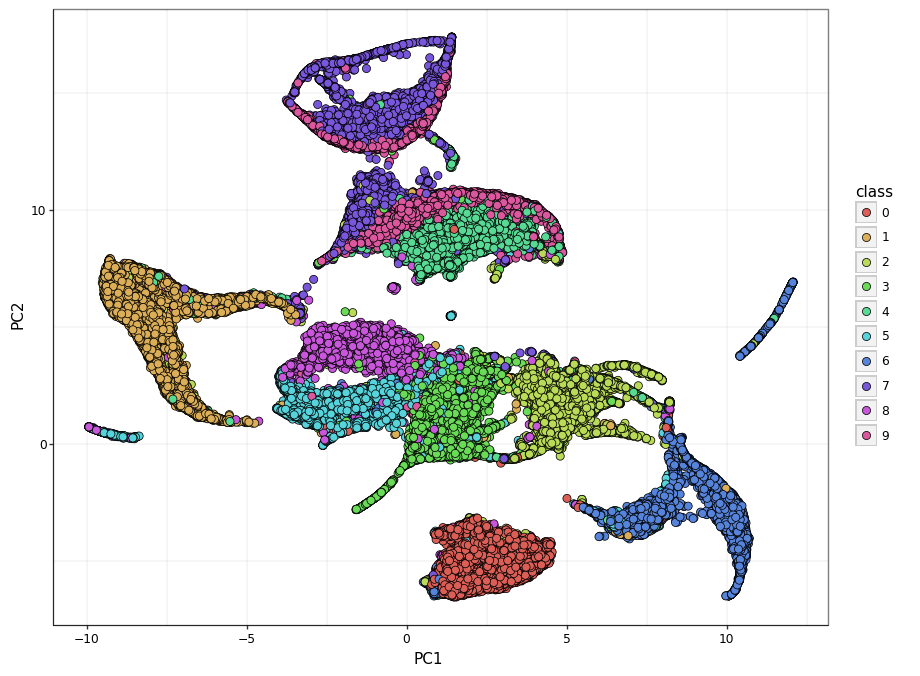

In [21]:
import umap
trans_umap = umap.UMAP().fit(train_images)
train_images_compressed_umap  = trans_umap.transform(train_images)
test_images_compressed_umap = trans_umap.transform(test_images)

transposed_umap = train_images_compressed_umap.T

visualise_train_umap = pd.DataFrame({'PC1':np.array(transposed_umap)[0], 'PC2':np.array(transposed_umap)[1], 'class': train_labels})
visualise_train_umap['class'] = visualise_train_umap['class'].astype("category")
fig = (   
    ggplot(data = visualise_train_umap,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(aes(fill = 'class'), size = 3, shape = 'o', stroke = 0.3) +
    
    # All the style related codes goes here:
    labs(title ='', x = 'PC1', y = 'PC2',) +
    theme_bw() +  
    theme(figure_size = (10, 8),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
).draw()

## Bonus exercise 2 (0.5 bonus points):

<font color='red'> Use the output of bonus exercise 1 (either from t-SNE or UMAP) to train your favourite ML model and compare its performance with the same model trained on the original data and on data transformed with conventional PCA. What differences you observe and why? </font> 

<font color='blue'>Speed is about the same as pca. Using more than 2 features surprisingly barely improved accuracy (2 is default value). So, the low accuracy must be because of my suboptimal hyperparameters. 
</font>

In [22]:
logisticRegr = LogisticRegression(solver = 'lbfgs')
start_time = time.time()
logisticRegr.fit(train_images_compressed_umap, train_labels)
end_time = time.time()
exec_time = f"{end_time - start_time:.2f}"
score = accuracy_score(test_labels,  logisticRegr.predict(test_images_compressed_umap))
n_features = logisticRegr.n_features_in_
print(f"It took {exec_time} seconds to get {score} accuracy using {n_features} features")

It took 8.61 seconds to get 0.8302 accuracy using 2 features


## Bonus exercise 3 (4 bonus points):

<font color='red'> In this Exercise, you are going to implement K-means step by step and run it on the three datasets we used before (moons, circles and the one without a structure)   

* Implement K-means using only numpy and basic python operations (**no sklearn**)
* Run it on the same three datasets used before (moons, circles and the one without a structure). Compare the resulting clusters with those we got before using sklearn KMeans.
* For every dataset, plot the sum of euclidean distances between points in a cluster and its center, at every step.
* For one dataset of the three, make a gif or any animation to show how the means evolve during training. (hint: you can use this [library](https://pypi.org/project/gif/) or any other ploting method of your choice. Use a smaller number of samples to get better visuals.)</font>


<font color="blue"> Results from my own implementation of KMeans are almost identical to the results gotten from sklearn KMeans. Only one point got into a different cluster in nostructure.</font>

---

<font color='blue'>* Implement K-means using only numpy and basic python operations (**no sklearn**) ✅</font>

<font color='blue'>* Run it on the same three datasets used before (moons, circles and the one without a structure). Compare the resulting clusters with those we got before using sklearn KMeans.
</font>✅

<font color='blue'>* For every dataset, plot the sum of euclidean distances between points in a cluster and its center, at every step.</font>✅

<font color='blue'>* For one dataset of the three, make a gif or any animation to show how the means evolve during training. </font>✅




 # Bonus 3.1 Implement K-means using only numpy and basic python operations (no sklearn)

In [23]:
import random
def kmeans_impl(n_clusters, data, random_state, return_intermediate_steps=False):
  if n_clusters > len(data):
    raise Exception("n_clusters exeeds data length")

  def dist(point1, point2):
    return(np.sqrt(np.sum(np.abs(point1 - point2)**2)))

  # divide points into clusters based on centroids
  def calculte_clusters(centroids):
    clusters = [[] for _ in centroids]
    for node in data.values:
      min = -1
      min_node = (-1, -1)
      cluster = -1
      for i, cluster_center in enumerate(centroids):
        distance = dist(node, cluster_center)
        if distance < min or i == 0:
          min = distance
          cluster = i
          min_node = node
      clusters[cluster].append(min_node)
    return clusters

  # new centroid positions based on formed clusters
  def calculate_centroids(clusters, prev_centroids):
    centroids = [centroid for centroid in prev_centroids]
    for i, cluster in enumerate(clusters):
      if len(cluster) > 0:
        x = [p[0] for p in cluster]
        y = [p[1] for p in cluster]
        centroids[i] = (sum(x)/len(cluster), sum(y)/len(cluster))
    return centroids

  # pick random points as centers
  random.seed(random_state)
  centroids = [point for point in random.sample([list(_) for _ in data.values], n_clusters)]

  # apply K-means
  intermediate_data = [] # ex 3.3 
  while True:
    prev_centroids = centroids
    clusters = calculte_clusters(centroids)
    centroids = calculate_centroids(clusters, prev_centroids)
    intermediate_data.append({"clusters": clusters, "centroids": centroids}) # for ex 3.3 
    if centroids == prev_centroids:
      break

  result = {}
  for label, cluster in enumerate(clusters):
    for node in cluster:
      result[tuple(node)] = label
      
  if return_intermediate_steps:
    return intermediate_data # ex 3.3

  # return labels of points
  return np.array([result[tuple(node)] for node in data.values])

In [24]:
kmeans_imp_predict = kmeans_impl(n_clusters = 2, data = cluster_data, random_state = 0)

# Bonus 3.2 Run it on the same three datasets used before (moons, circles and the one without a structure).

<font color="red"> Compare the resulting clusters with those we got before using sklearn KMeans. </font>

<font color="blue"> Results from my own implementation of KMeans are almost identical to the results gotten from sklearn KMeans. Only one point got into a different cluster in nostructure.</font>

In [25]:
from sklearn import datasets

np.random.seed(111)
n_samples = 100

# Creating three datasets: circles, moons and no-structure
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)
noisy_circles_pd = pd.DataFrame({'x':noisy_circles[0][:,0], 'y':noisy_circles[0][:,1], 'clusters':noisy_circles[1]})
noisy_circles_pd['clusters'] = noisy_circles_pd['clusters'].astype('category')

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
noisy_moons_pd = pd.DataFrame({'x':noisy_moons[0][:,0], 'y':noisy_moons[0][:,1], 'clusters':noisy_moons[1]})
noisy_moons_pd['clusters'] = noisy_moons_pd['clusters'].astype('category')

no_structure = np.random.rand(n_samples, 2), None
no_structure_pd = pd.DataFrame({'x':no_structure[0][:,0], 'y':no_structure[0][:,1], 'clusters':np.zeros(len(no_structure[0]))})
no_structure_pd['clusters'] = no_structure_pd['clusters'].astype('category')

noisy_circles_pd['plot_id'] = 'circles'
noisy_moons_pd['plot_id'] = 'moons'
no_structure_pd['plot_id'] = 'nostructure'

noisy_data_pd = pd.concat([noisy_circles_pd, noisy_moons_pd, no_structure_pd], axis=0)
noisy_data_pd.shape
noisy_data_pd['plot_id'] = noisy_data_pd['plot_id'].astype('category')
noisy_data_pd['clusters'] = noisy_data_pd['clusters'].astype('category')

In [26]:
# use my own k-means implementation
noisy_circles_pd['predicted'] = kmeans_impl(n_clusters=2, random_state=0, data= noisy_circles_pd[['x','y']])
noisy_moons_pd['predicted'] = kmeans_impl(n_clusters=2, random_state=0, data= noisy_moons_pd[['x','y']])
no_structure_pd['predicted'] = kmeans_impl(n_clusters=2, random_state=0, data= no_structure_pd[['x','y']])

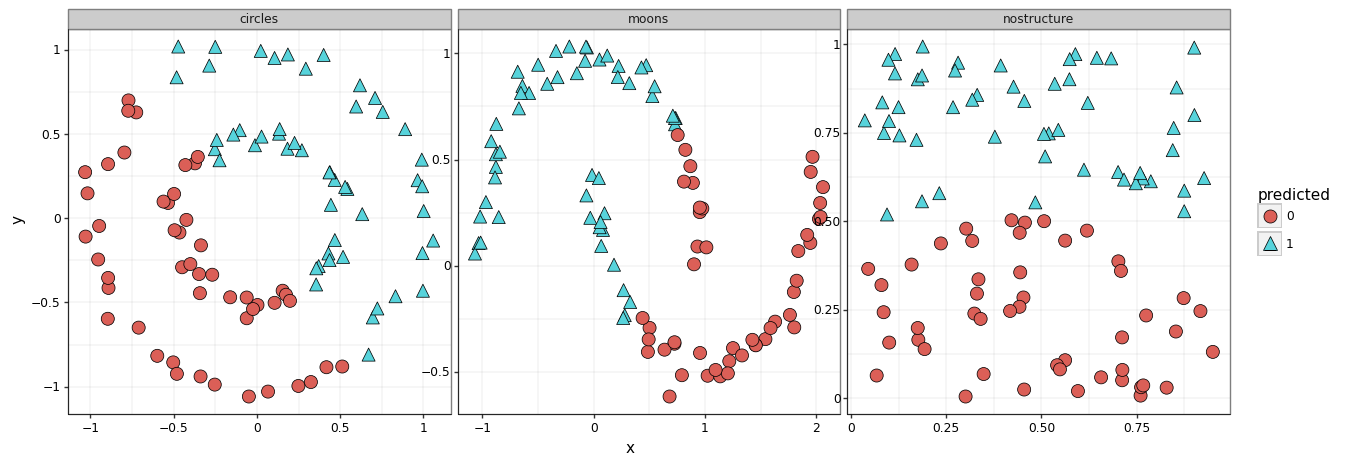

<ggplot: (8732056533673)>

In [27]:
noisy_data_pd = pd.concat([noisy_circles_pd, noisy_moons_pd, no_structure_pd], axis=0)
noisy_data_pd.shape
noisy_data_pd['plot_id'] = noisy_data_pd['plot_id'].astype('category')
noisy_data_pd['clusters'] = noisy_data_pd['clusters'].astype('category')
noisy_data_pd['predicted'] = noisy_data_pd['predicted'].astype('category')

fig = (
    ggplot(data = noisy_data_pd,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(shape = 'predicted',
                   fill = 'predicted'), 
               size = 5.0,
               stroke = 0.3,
               colour = 'black') +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    theme_bw() +
    facet_wrap('~plot_id', scales = 'free') + 
    theme(figure_size = (15, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

# Bonus 3.3 For every dataset, plot the sum of euclidean distances between points in a cluster and its center, at every step

In [28]:
# use my own k-means implementation
noisy_circles_pd_euclidean_sum = kmeans_impl(n_clusters=2, random_state=0, data= noisy_circles_pd[['x','y']], return_intermediate_steps=True)
noisy_moons_pd_euclidean_sum = kmeans_impl(n_clusters=2, random_state=0, data= noisy_moons_pd[['x','y']], return_intermediate_steps=True)
no_structure_pd_euclidean_sum = kmeans_impl(n_clusters=2, random_state=0, data= no_structure_pd[['x','y']], return_intermediate_steps=True)

In [29]:
def plot_euclidean_sum(intermediate_data, title, subplot):
  eqlidean_sum = []
  cluster_labels = [f"cluster {i}" for i in range(len(intermediate_data[0]["clusters"]))]
  for iteration, data in enumerate(intermediate_data):
    row = []
    for cluster, centroid in zip(data['clusters'], data['centroids']):
      row.append(np.sum([dist(point, centroid) for point in cluster]))
    eqlidean_sum.append(row)
  df = pd.DataFrame(eqlidean_sum, columns = cluster_labels)
  ax = df.plot.bar(ax = axes[subplot], stacked=True, title=title)
  ax.set_xlabel("Iterations")
  ax.set_ylabel("Sum of cluster points distance to center")

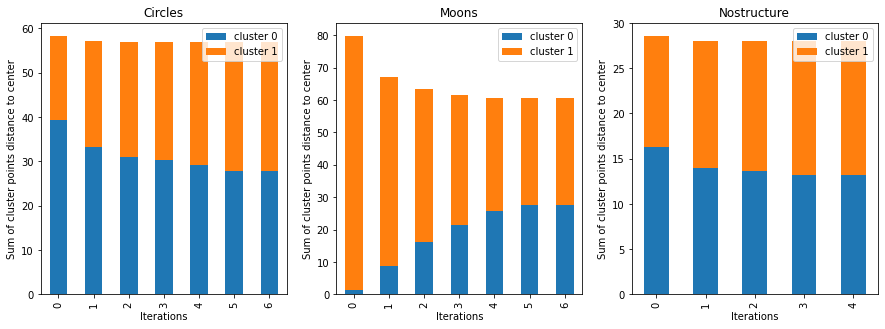

In [30]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize = (15, 5))
plot_euclidean_sum(noisy_circles_pd_euclidean_sum, "Circles", 0)
plot_euclidean_sum(noisy_moons_pd_euclidean_sum, "Moons", 1)
plot_euclidean_sum(no_structure_pd_euclidean_sum, "Nostructure", 2)
plt.show()

# Bonus 3.4 For one dataset of the three, make a gif or any animation to show how the means evolve during training.

In [31]:
from matplotlib.animation import FuncAnimation
from IPython import display

In [32]:
# use my own k-means implementation
noisy_circles_gif = kmeans_impl(n_clusters=2, random_state=0, data= noisy_circles_pd[['x','y']], return_intermediate_steps=True)
noisy_moons_gif = kmeans_impl(n_clusters=2, random_state=0, data= noisy_moons_pd[['x','y']], return_intermediate_steps=True)
no_structure_gif = kmeans_impl(n_clusters=2, random_state=0, data= no_structure_pd[['x','y']], return_intermediate_steps=True)

In [33]:
def animateKmeans(dataframe, xlim, ylim):
  def AnimationFunction(frame):  
    plt.clf()
    data = dataframe[frame]
    i = 0
    for cluster, centroid in zip(data['clusters'], data['centroids']):
      x = [p[0] for p in cluster]
      y = [p[1] for p in cluster]
      if i == 0:
        plt.scatter(x, y, label="cluster 0", s=200, marker="o", color="tab:blue")
        plt.scatter(*centroid, label="centroid 0", s=1000, marker="X", color="midnightblue" )
      else:
        plt.scatter(x, y, label="cluster 1", s=200, marker="^", color="tab:orange")
        plt.scatter(*centroid, label="centroid 1", s=1000, marker="X", color="firebrick" )
      i+= 1
    plt.xlim(*xlim) 
    plt.ylim(*ylim)
    #plt.legend(loc='upper right')
    plt.title(f"Iteration {frame}", fontsize=16)

  Figure = plt.figure(figsize=(10, 10))
  anim_created = FuncAnimation(Figure, AnimationFunction, frames=len(dataframe), interval=1000)
  video = anim_created.to_html5_video()
  html = display.HTML(video)
  display.display(html)
  plt.close()

# Added gif link, because submitted notebook doesn't retain gifs

![gif](https://i.imgur.com/z7y5oHK.gif)

In [35]:
animateKmeans(noisy_circles_gif, xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))

In [36]:
animateKmeans(noisy_moons_gif, xlim=(-1.5, 2.5), ylim=(-0.7, 1.1))

In [37]:
animateKmeans(no_structure_gif, xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))

# Comments (optional feedback to the course instructors)
Here, please, leave your comments regarding the homework, possibly answering the following questions: 
* how much time did you spend on this homework?
* was it too hard/easy for you?
* what would you suggest to add or remove?
* anything else you would like to tell us

Your comments:

# <font color='red'>  End of the homework. Please don't delete this cell.</font>